 ZINC, NOC and PDB are non drug datasets, the one with molecules that differ more than drugs is ZINC 

In [1]:
import pandas as pd
import numpy as np 

In [2]:
# read .smiles file
with open('drugability/data/zinc15_nondrugs_sample.smiles', 'r') as f:
    non_drug_sample = f.readlines()
    non_drug_sample = [x.strip() for x in non_drug_sample]


with open('drugability/data/zinc15_world_drugs_clean.smiles', 'r') as f:
    world_drug_sample = f.readlines()
    world_drug_sample = [x.strip() for x in world_drug_sample]


with open('drugability/data/fda_approved_below128atoms.smiles', 'r') as f:
    fda_approved_below128atoms = f.readlines()
    fda_approved_below128atoms = [x.strip() for x in fda_approved_below128atoms]


with open('drugability/data/drugs_approved.smiles', 'r') as f:
    drugs_approved = f.readlines()
    drugs_approved = [x.strip() for x in drugs_approved]



In [3]:
fda_approved = pd.read_csv('drugability/data/fda_approved.csv')

clintox_cleaned = pd.read_csv('drugability/data/clintox_cleaned.csv')

pdb_below_tanimoto = pd.read_csv('drugability/data/pdb_below_tanimoto0.85_to_fda.csv')

tox21 = pd.read_csv('drugability/data/tox21.csv')

In [4]:
# drugs_approved_rdkit = np.load('drugability/data/drugs_approved_rdkit.npz', allow_pickle = False)

In [5]:
len(fda_approved)

2136

In [6]:
fda_approved

,DrugBank ID,SMILES,Ro5,bRo5,eRo5
0,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,False,True,False
1,DB00007,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,False,True,False
2,DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,False,True,False
3,DB00027,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,False,True,False
4,DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,False,True,False
...,...,...,...,...,...
2131,DB15480,CC(=O)OC1=CC(O)=CC=C1,True,False,False
2132,DB15534,COC1=C(OC)C(OC)=C2C(CCC(NC(C)=O)C3=CC(=O)C(O)=...,True,False,False
2133,DB15566,[H][C@@]12CC[C@](O)(C(=O)COC(C)=O)[C@@]1(C)C[C...,True,False,False
2134,DB15576,CCOC(=O)C1=CC=CC=C1O,True,False,False


In [7]:
len(non_drug_sample)

4987

In [8]:
# create a dataset with the smiles from fda_approved dataset and non_drug_sample list, assigning label 1 to fda_approved and 0 to non_drug_sample
df_drugs = pd.DataFrame({'smiles': fda_approved.SMILES, 'label': 1})
df_non_drugs = pd.DataFrame({'smiles': non_drug_sample, 'label': 0})

# concatenate the two dataframes
df = pd.concat([df_drugs, df_non_drugs], ignore_index=True)


In [9]:
df

,smiles,label
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,1
1,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,1
2,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,1
3,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,1
4,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,1
...,...,...
7118,CSC[C@@H](C)NC(=O)N[C@@H](C(N)=O)c1ccccc1,0
7119,c1cnc(NCc2cncc3c2CC[N@@H+]([C@@H]2CCOC2)C3)nc1,0
7120,CCCCOc1ccc(/C=C(\C#N)C(=O)Nc2ccc(S(=O)(=O)[N-]...,0
7121,C=C[C@@H]1O[C@@H](c2ccccc2)OC[C@@H]1O,0


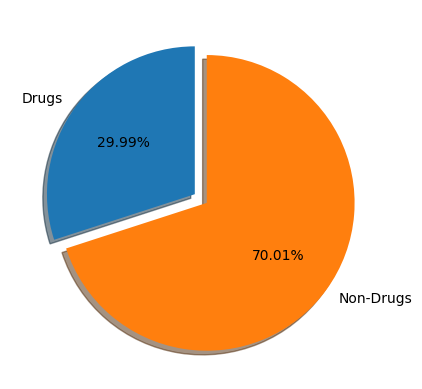

In [10]:
# plot piechart with label propportions
import matplotlib.pyplot as plt

labels = 'Drugs', 'Non-Drugs'
sizes = [len(df_drugs), len(df_non_drugs)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Non-Drugs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()  

In [11]:
# balance the label with random undersampling 
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(df[['smiles']], df['label'])

# recreate the dataframe with the balanced data
balanced_df = pd.concat([pd.DataFrame(X_res, columns=['smiles']), pd.DataFrame(y_res, columns=['label'])], axis=1)

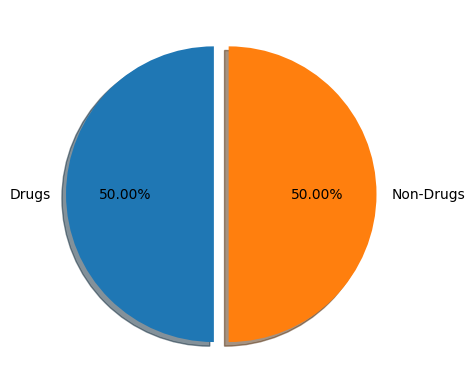

In [12]:
labels = 'Drugs', 'Non-Drugs'
sizes = [len(balanced_df[balanced_df["label"] == 1]), len(balanced_df[balanced_df["label"] == 0])]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Non-Drugs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()  

In [13]:
balanced_df

,smiles,label
0,COc1ccccc1/C=N/c1ccccc1C#N,0
1,Cc1nccn1-c1ccc([C@@H](C)NC(=O)[C@H](C)OCC2CC2)cc1,0
2,C#CCNC(=O)CNC(=O)Nc1cccc(C[S@](=O)c2ccccc2)c1,0
3,Cc1cc(OC(F)F)ccc1NC(=O)N(CCO)Cc1ccco1,0
4,CCc1ccc([C@H](C)NC(=O)[C@]2(C)CC2(Br)Br)cc1,0
...,...,...
4267,CC(=O)OC1=CC(O)=CC=C1,1
4268,COC1=C(OC)C(OC)=C2C(CCC(NC(C)=O)C3=CC(=O)C(O)=...,1
4269,[H][C@@]12CC[C@](O)(C(=O)COC(C)=O)[C@@]1(C)C[C...,1
4270,CCOC(=O)C1=CC=CC=C1O,1


In [137]:
#compute morgan fingerprints for the smiles in the df 
from rdkit import Chem
from rdkit.Chem import AllChem

def smiles_to_morgan_fingerprint(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    return fp

# add a column with it
balanced_df['morgan_fingerprint'] = balanced_df['smiles'].apply(smiles_to_morgan_fingerprint)




# add column with Mold2 descriptors
from rdkit.Chem import Descriptors

def smiles_to_mold2_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = []
    for descriptor, function in Descriptors.descList:
        descriptors.append(function(mol))
    return descriptors


balanced_df['mold2_descriptors'] = balanced_df['smiles'].apply(smiles_to_mold2_descriptors)



# add column with RDKit descriptors
from rdkit.Chem import rdMolDescriptors	

def smiles_to_rdkit_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = []
    for descriptor, function in rdMolDescriptors.Properties.Properties.GetAvailableProperties():
        descriptors.append(function(mol))
    return descriptors


balanced_df['rdkit_descriptors'] = balanced_df['smiles'].apply(smiles_to_rdkit_descriptors)


# add column for MCS descriptors

from rdkit.Chem import rdFMCS

def smiles_to_mcs_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mcs = rdFMCS.FindMCS([mol])
    return mcs.numAtoms, mcs.numBonds, mcs.numAtomRings, mcs.numBondRings, mcs.canceled

balanced_df['mcs_descriptors'] = balanced_df['smiles'].apply(smiles_to_mcs_descriptors)


# add column for MACCS keys
from rdkit.Chem import MACCSkeys

def smiles_to_maccs_keys(smiles):
    mol = Chem.MolFromSmiles(smiles)
    maccs_keys = MACCSkeys.GenMACCSKeys(mol)
    return maccs_keys

balanced_df['maccs_keys'] = balanced_df['smiles'].apply(smiles_to_maccs_keys)


# add column for ECFP4 keys
from rdkit.Chem import rdMolDescriptors

def smiles_to_ecfp4_keys(smiles):
    mol = Chem.MolFromSmiles(smiles)
    ecfp4_keys = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return ecfp4_keys

balanced_df['ecfp4_keys'] = balanced_df['smiles'].apply(smiles_to_ecfp4_keys)


In [16]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




In [54]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_test, y_test, threshold=0.5):
    predictions = model.predict(X_test)
    predictions = (predictions > threshold)
    print(classification_report(y_test,predictions))
    print("Accuracy on test set: ", accuracy_score(y_test, predictions))
    cm = confusion_matrix(y_test,predictions)
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')


Epoch 1/5
27/27 [==============================] - 1s 19ms/step - loss: 0.4553 - accuracy: 0.7867 - val_loss: 0.3457 - val_accuracy: 0.8561
Epoch 2/5
27/27 [==============================] - 0s 13ms/step - loss: 0.1606 - accuracy: 0.9391 - val_loss: 0.3628 - val_accuracy: 0.8702
Epoch 3/5
27/27 [==============================] - 0s 12ms/step - loss: 0.0408 - accuracy: 0.9889 - val_loss: 0.4499 - val_accuracy: 0.8643
Epoch 4/5
27/27 [==============================] - 0s 12ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.5297 - val_accuracy: 0.8655
Epoch 5/5
27/27 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.5750 - val_accuracy: 0.8690


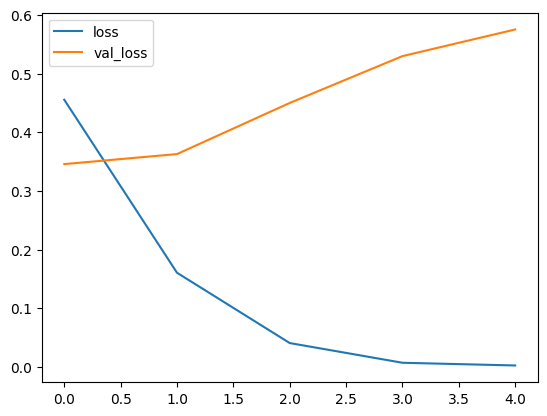

In [90]:
# define the model
model = Sequential()

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024/2, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation= "sigmoid"))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


# split the data into train and test
X = np.array(list(balanced_df['morgan_fingerprint']))
y = np.array(list(balanced_df['label']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))


model_loss = pd.DataFrame(model.history.history)
model_loss[["loss", "val_loss"]].plot()
plt.show()



27/27 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       448
           1       0.84      0.89      0.87       407

    accuracy                           0.87       855
   macro avg       0.87      0.87      0.87       855
weighted avg       0.87      0.87      0.87       855

Accuracy on test set:  0.8690058479532163


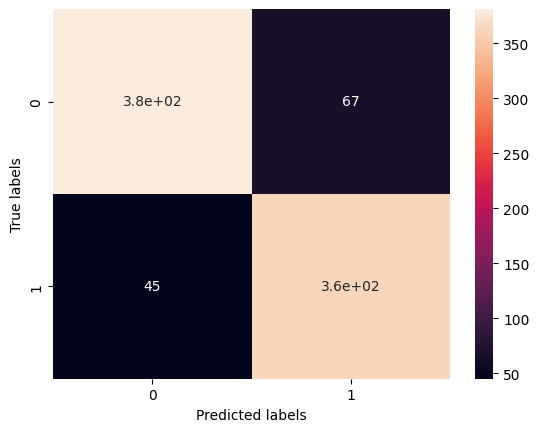

In [91]:
evaluate_model(model, X_test, y_test)


In [42]:
len(balanced_df["morgan_fingerprint"][0])

2048

In [41]:
len(balanced_df["mold2_descriptors"][0])

208

Epoch 1/5


c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\utils\extmath.py:1066: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\preprocessing\_data.py:86: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


27/27 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.4760
Epoch 2/5
27/27 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.4760
Epoch 3/5
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6933 - val_accuracy: 0.4760
Epoch 4/5
27/27 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6934 - val_accuracy: 0.4760
Epoch 5/5
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6934 - val_accuracy: 0.4760


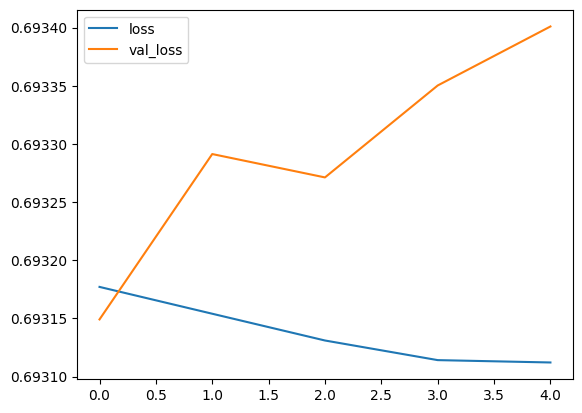

In [105]:
# define the model
model = Sequential()

model.add(Dense(64*2, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation= "sigmoid"))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])



# split the data into train and test
X = np.array(list(balanced_df['mold2_descriptors']))
y = np.array(list(balanced_df['label']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))


model_loss = pd.DataFrame(model.history.history)
model_loss[["loss", "val_loss"]].plot()
plt.show()



27/27 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       448
           1       0.48      1.00      0.65       407

    accuracy                           0.48       855
   macro avg       0.24      0.50      0.32       855
weighted avg       0.23      0.48      0.31       855

Accuracy on test set:  0.4760233918128655


c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

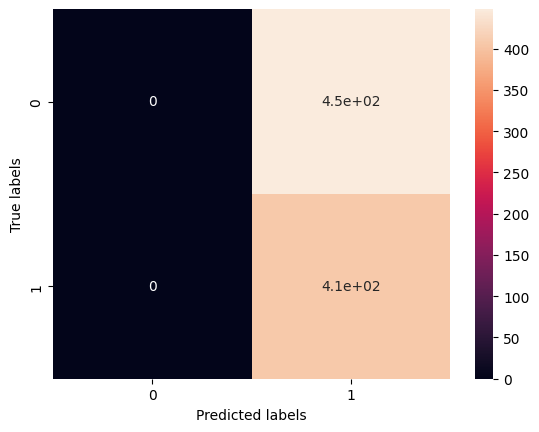

In [106]:
evaluate_model(model, X_test, y_test, threshold=0.5)

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

In [131]:


def cross_validation(X, y, model_func, n_splits=5, verbose=0, epochs=5):

  acc_per_fold = []
  loss_per_fold = []

  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=n_splits, shuffle=True)
  
  # K-fold Cross Validation model evaluation
  fold_no = 1
  for train, test in kfold.split(X, y):

    # Define the model architecture
    model = model_func()

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    X_train = X[train]
    y_train = y[train]

    X_test = X[test]
    y_test = y[test]

    # Fit data to model
    history = model.fit(X_train, y_train,
                batch_size=128,
                epochs=epochs,
                verbose=verbose)

    # Generate generalization metrics
    scores = model.evaluate(X_test, y_test, verbose=verbose)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

  print("\nMean accuracy in folds: ", np.mean(acc_per_fold))
  
  return acc_per_fold, loss_per_fold

### Feed foward network with morgan fingerprints 

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.5948343276977539; accuracy of 86.11111044883728%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.5266545414924622; accuracy of 88.01169395446777%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.575374960899353; accuracy of 87.1156632900238%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.6213619112968445; accuracy of 85.35870909690857%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.507885754108429; accuracy of 87.55490779876709%

Mean accuracy in folds:  86.8304169178009

Evaluation on test set: 
27/27 [==============================] - 0s 4ms/step
           

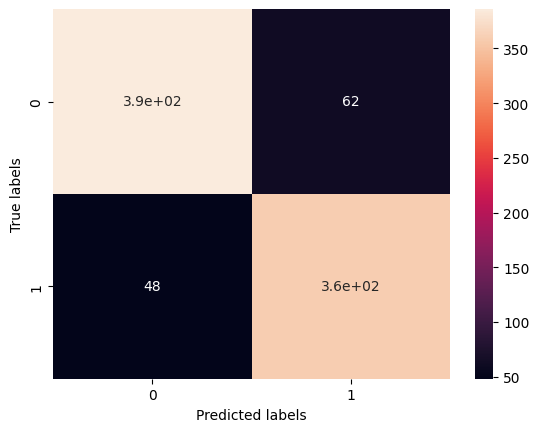

In [132]:


X = np.array(list(balanced_df["morgan_fingerprint"]))
y = np.array(list(balanced_df["label"]))

# split train and test with train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def create_model():
  # define the model
  model = Sequential()

  model.add(Dense(2048, activation='relu'))
  model.add(Dropout(0.1))

  model.add(Dense(2048/2, activation='relu'))
  model.add(Dropout(0.1))

  model.add(Dense(1, activation= "sigmoid"))

  model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return model

# perform cross validation
acc_per_fold, loss_per_fold = cross_validation(X_train, y_train, create_model, n_splits=5, verbose = 0)

# train model on whole train set and test in on the independent test set
model = create_model()
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
print("\nEvaluation on test set: ")
evaluate_model(model, X_test, y_test, threshold=0.5)

### Feed foward network with MCS descriptors

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.6939746141433716; accuracy of 48.68420958518982%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.6931911706924438; accuracy of 47.514620423316956%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of nan; accuracy of 48.02342653274536%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of nan; accuracy of 51.53733491897583%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.6930325031280518; accuracy of 51.39092206954956%

Mean accuracy in folds:  49.430102705955505

Evaluation on test set: 
27/27 [==============================] - 0s 845us/step
              precision    recall

c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

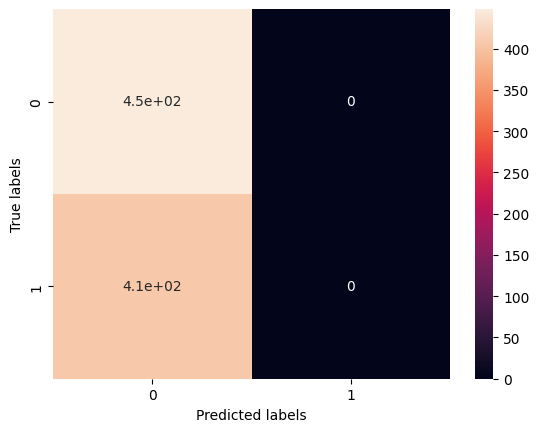

In [135]:


X = np.array(list(balanced_df["mold2_descriptors"]))
y = np.array(list(balanced_df["label"]))

# split train and test with train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def create_model():
  # define the model
  model = Sequential()

  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.1))

  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.1))

  model.add(Dense(1, activation= "sigmoid"))

  model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return model

# perform cross validation
acc_per_fold, loss_per_fold = cross_validation(X_train, y_train, create_model, n_splits=5, verbose = 0)

# train model on whole train set and test in on the independent test set
model = create_model()
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
print("\nEvaluation on test set: ")
evaluate_model(model, X_test, y_test, threshold=0.5)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [115]:


# define X and y
X = np.array(list(balanced_df["morgan_fingerprint"]))
y = np.array(list(balanced_df["label"]))



In [116]:
def create_baseline():
    # define the model
    model = Sequential()

    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(2048/2, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(1, activation= "sigmoid"))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
                

In [117]:
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Installed_programs\Conda\envs\bio_grasso\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\natha\AppData\Roaming\Python\Python310\site-packages\scikeras\wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\natha\AppData\Roaming\Python\Python310\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "C:\Users\natha\AppData\Roaming\Python\Python310\site-packages\scikeras\wrappers.py", line 929, in _fit
    self._check_model_compatibility(y)
  File "C:\Users\natha\AppData\Roaming\Python\Python310\site-packages\scikeras\wrappers.py", line 551, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
TypeError: object of type 'NoneType' has no len()
